In [5]:
from CAENpy.CAENDigitizer import CAEN_DT5740_Digitizer
import numpy as np
import matplotlib.pyplot as plt
import time, importlib

In [6]:
digitizer = CAEN_DT5740_Digitizer(0) # Open the connection.

print(digitizer.idn) # Print general info about the digitizer.

RuntimeError: libCAENDigitizer has returned error code -25.

In [7]:
def configure_digitizer(digitizer):
	#digitizer.set_sampling_frequency(MHz=5000)
	digitizer.set_record_length(1024)
	digitizer.set_max_num_events_BLT(1)
	digitizer.set_acquisition_mode('sw_controlled')
	digitizer.set_ext_trigger_input_mode('disabled')
	#digitizer.write_register(0x811C, 0x000D0001) # Enable busy signal on GPO.
	digitizer.setup_trigger()
	#digitizer.set_fast_trigger_mode(enabled=True)
	#digitizer.set_fast_trigger_digitizing(enabled=True)
	digitizer.enable_channels([True, True, True, False])
	#digitizer.set_fast_trigger_threshold(22222)
	#digitizer.set_fast_trigger_DC_offset(V=0)
	#digitizer.set_post_trigger_size(0)
	for ch in [0,1]:
		digitizer.set_trigger_polarity(channel=ch, edge='rising')

Reading 1 events....


KeyError: 24

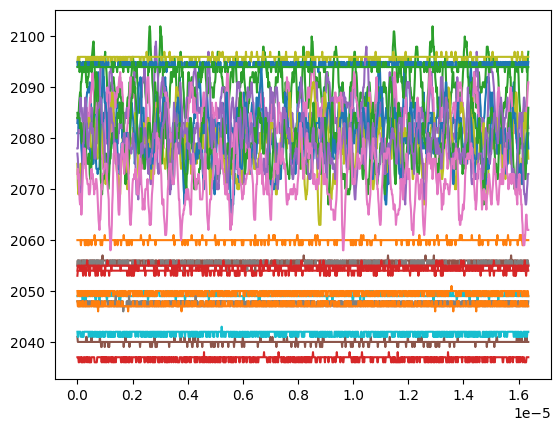

In [9]:
# Now configure the digitizer:
configure_digitizer(digitizer)
digitizer.set_max_num_events_BLT(1) # One event per call to `digitizer.get_waveforms`.
# More configuration here...
#digitizer.setup_trigger()
#digitizer.enable_channels(True, True)

# Now enter into acquisition mode using the `with` statement:
with digitizer:
	waveforms = digitizer.get_waveforms()

plt.figure()
for wf in waveforms:
	for ch in range(0,18,2):
		plt.plot(wf['time'], wf[ch])
plt.show()